In [1]:
# ENGG1003 Digital Literacy and Computational Thinking - P
#
# Course Project
#
# I declare that the project here submitted is original
# except for source material explicitly acknowledged,
# and that the same or closely related material has not been
# previously submitted for another course.
# I also acknowledge that I am aware of University policy and
# regulations on honesty in academic work, and of the disciplinary
# guidelines and procedures applicable to breaches of such
# policy and regulations, as contained in the website.
#
# University Guideline on Academic Honesty:
# https://www.cuhk.edu.hk/policy/academichonesty/
#
# Student Name : Tsang Tsz Hin
# Student ID : 1155175030
# Class/Section : ENGG1003
# Date : 9 November, 2021

In [2]:
#This project is about finding the relationship between tesla stock price and tesla's google search trend
#all data are extracted weekly from 2020-11-09 to 2021-11-01
#The project is mainly executed in Python 
#the stock price data is extracted from yahoo finance and the format was CSV file
#the search trend data is extracted from Google trend and the format was CSV file
#In Google Trend, numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term.
#I converted both CSV file into an excel file for easier data manipulation
#after combining two data, I removed the High, Low, Open, Close field 
#Adj Close will then be used to represent the stock price
#I will first describe the statistical data of both search trend and stock price
#Then I will plot a line graph for the stock price and a pie chart for search trend
#After that I will plot a scatter graph of tesla's search trend and adj close
#At last I will run the correlation between two data and see their relevance

In [3]:
#pandas will be used mainly to read files
#matplotlib will be used mainly to plot graphs
#numpy will be used mainly to make numpy array
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#Import dataframe for Tesla's closing price and Google search trend
#Using panda.read_excel to read 'Project.xlsx' file
#applying Index_col = 0 can help make the Date as the Primary Key for the dataframe
tsla = pd.read_excel("Project.xlsx", index_col=0)
#dataframe shape, two field and 52 records
tsla.shape

(52, 2)

In [5]:
#first 5 rows of the data
tsla.head()

,Adj Close,Search Trend
Date,,
2020-11-09,408.500000,49
2020-11-16,489.609985,65
2020-11-23,585.760010,64
2020-11-30,599.039978,62
2020-12-07,609.989990,66


In [6]:
#last 5 rows of the data
tsla.tail()

,Adj Close,Search Trend
Date,,
2021-10-04,785.489990,55
2021-10-11,843.030029,57
2021-10-18,909.679993,63
2021-10-25,1114.000000,89
2021-11-01,1222.089970,86


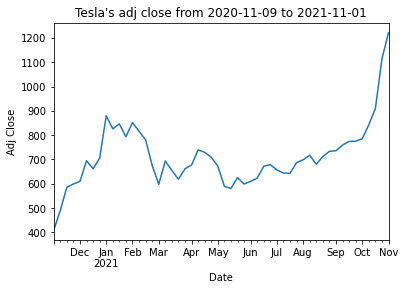

In [7]:
#plotting the line graph for adj close
#the recent stock price has surged
tsla['Adj Close'].plot()
plt.title("Tesla's adj close from 2020-11-09 to 2021-11-01")
plt.ylabel('Adj Close')
plt.show()

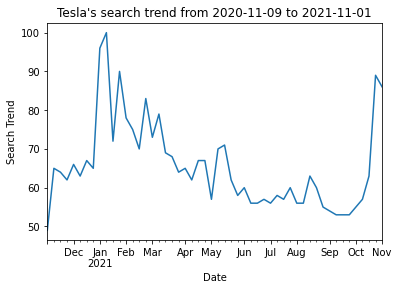

In [8]:
#plotting the line graph for search trend
tsla['Search Trend'].plot()
plt.title("Tesla's search trend from 2020-11-09 to 2021-11-01")
plt.ylabel('Search Trend')
plt.show()

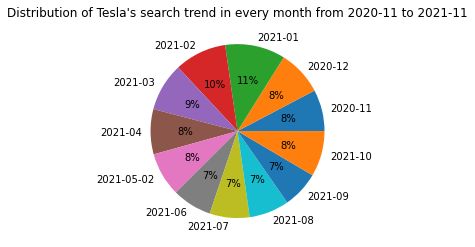

In [9]:
#Distribution of Tesla's avaerage search trend in every month from 2020-11 to 2021-11
#using pie chart can help illustrate the distribution of search trend
values = np.array([60, 65.25, 87.2, 75.25, 70, 65.25, 63.6, 57.25,57.75,58,53.25,66])
labels = np.array(['2020-11', '2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-05-02', '2021-06', '2021-07', '2021-08', '2021-09', '2021-10'])
plt.pie(values, labels = labels, autopct = '%1.0f%%')
plt.title("Distribution of Tesla's search trend in every month from 2020-11 to 2021-11")
plt.show()
#the search trend is actually evenly distributed in range of 7% to 11% 
#the highest percentage of search trend is on 2021 January and Feburary, this also match the small peak of stock price at the same period
#however the recent stock price search has little relationship in recent search trend

In [10]:
#Data summarization for Tesla's Search Trend on Google
tsla['Search Trend'].describe()

count     52.000000
mean      65.576923
std       11.479472
min       49.000000
25%       57.000000
50%       63.000000
75%       70.000000
max      100.000000
Name: Search Trend, dtype: float64

In [11]:
#Data summarization for Tesla's Adjusted Closing Price
tsla['Adj Close'].describe()

count      52.000000
mean      712.579807
std       132.850423
min       408.500000
25%       638.839996
50%       690.464996
75%       774.597504
max      1222.089970
Name: Adj Close, dtype: float64

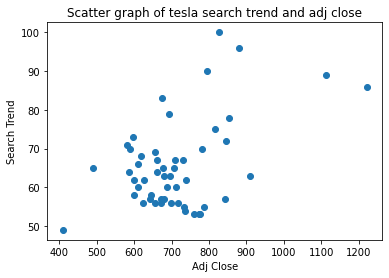

In [17]:
#Scatter graph of tesla's search trend and adj close
plt.scatter(tsla['Adj Close'], tsla['Search Trend'])
plt.xlabel('Adj Close')
plt.ylabel('Search Trend')
plt.title("Scatter graph of tesla search trend and adj close")
plt.show()

In [13]:
#correlation between Closing price and Search Trend
corr_tsla = tsla.corr(method='pearson', min_periods=1)

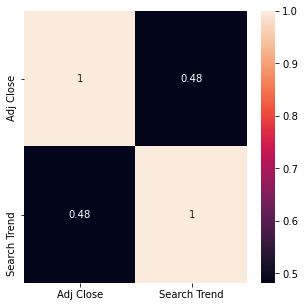

In [14]:
#using seaborn.heatmap to plot rectangular data as a color-encoded matrix
#heatmap help to visualize the data 
import seaborn as sn
fig, ax = plt.subplots(figsize=(5,5)) 
sn.heatmap(corr_tsla, annot = True, ax=ax)
plt.show()

In [15]:
#In conclusion the correlation is close to 0.5
#According to Pearson correlation coefficients, magnitude between 0.5 and 0.7 indicate variables which can be considered moderately correlated
#since the correlation is not strong enough, I beleive there are some other more important factors affected the stock price
#factors such as Tesla's Big plans for 2020, start of production in China and Surging Tesla Model 3 deliveries

In [16]:
#reference
#Yahoo! Finance. "Tesla, Inc. (TSLA) Stock Historical Prices & Data." November 09, 2021. Accessed November 09, 2021. https://finance.yahoo.com/quote/TSLA/history?p=TSLA.
#Google Trends. "tesla - Google Trends." November 09, 2021. Accessed November 09, 2021. https://trends.google.com/trends/explore?q=tesla